In [1]:
import requests
import pandas as pd
import datetime as dt
from datetime import timedelta
import subprocess
import json
import os
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

columns: <br/>
timestamp	count	uniques	day	mo	yr	collection_timestamp yr_mo_day

Example data: <br/>
'timestamp': '2019-10-07T00:00:00Z', 'count': 18, 'uniques': 1

In [2]:
def string_date(month, day, year):
    return year + '-' + month + '-' + day + 'T00:00:00Z'

def generate_14_days(month, day, year):
    start_date = string_date(month, day, year)
    start = dateutil.parser.parse(start_date)
    return [start + timedelta(hours=24*i) for i in range(14)]

def generate_data(start, part1, part2):
    mo, dy, yr = start
    days = generate_14_days(mo, dy, yr)
    ret_arr = []
    for i in range(14):
        ret_arr.append({
            'timestamp': days[i].isoformat()[:10] + 'T00:00:00Z', 
            'count': part1[i],
            'uniques': part2[i]
        })
    return ret_arr

def data_json_maker(kind, count, unique, data):
    return {
        'count': str(count),
        'uniques': str(unique),
        kind: data
    }

def generate_json_file(start, part1, part2, kind, count, unique):
    data = generate_data(start, part1, part2)
    json_format = data_json_maker(kind, count, unique, data)
    yr, mo, dy = start
    file_name = yr + '-' + mo + '-' + dy + '_' + kind + '-json.json'
    print(json_format)
    with open(file_name, 'w') as outfile:
        json.dump(json_format, outfile, indent=4)
    return json_format

In [3]:
# generate_data(('07', '27', '2019'), part1_08_08, part2_08_08)
start_date = ('07', '27', '2019')
part1_08_08 = [
    80, 80, 170, 260, 270, 370, 260, 80, 70, 340, 450, 500, 450, 0
]
part2_08_08 = [
    25, 35, 56, 70, 50, 70, 48, 20, 19, 57, 58, 63, 72, 0
]

# August 27th 2019
json_obj_1 = generate_json_file(start_date, part1_08_08, part2_08_08, 
                                'views', 3398, 501)

{'count': '3398', 'uniques': '501', 'views': [{'timestamp': '2019-07-27T00:00:00Z', 'count': 80, 'uniques': 25}, {'timestamp': '2019-07-28T00:00:00Z', 'count': 80, 'uniques': 35}, {'timestamp': '2019-07-29T00:00:00Z', 'count': 170, 'uniques': 56}, {'timestamp': '2019-07-30T00:00:00Z', 'count': 260, 'uniques': 70}, {'timestamp': '2019-07-31T00:00:00Z', 'count': 270, 'uniques': 50}, {'timestamp': '2019-08-01T00:00:00Z', 'count': 370, 'uniques': 70}, {'timestamp': '2019-08-02T00:00:00Z', 'count': 260, 'uniques': 48}, {'timestamp': '2019-08-03T00:00:00Z', 'count': 80, 'uniques': 20}, {'timestamp': '2019-08-04T00:00:00Z', 'count': 70, 'uniques': 19}, {'timestamp': '2019-08-05T00:00:00Z', 'count': 340, 'uniques': 57}, {'timestamp': '2019-08-06T00:00:00Z', 'count': 450, 'uniques': 58}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 500, 'uniques': 63}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 450, 'uniques': 72}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 0, 'uniques': 0}]}


In [4]:
start_date = ('07', '30', '2019')

part1_08_12 = [
    260, 265, 400, 255, 78, 68, 370, 450, 500, 450, 300, 240, 240, 180
]
part2_08_12 = [
    60, 50, 60, 50, 20, 19, 50, 55, 60, 70, 50, 40, 27, 43
]

json_obj_2 = generate_json_file(start_date, part1_08_12, part2_08_12, 
                                'views', 3977, 535)

{'count': '3977', 'uniques': '535', 'views': [{'timestamp': '2019-07-30T00:00:00Z', 'count': 260, 'uniques': 60}, {'timestamp': '2019-07-31T00:00:00Z', 'count': 265, 'uniques': 50}, {'timestamp': '2019-08-01T00:00:00Z', 'count': 400, 'uniques': 60}, {'timestamp': '2019-08-02T00:00:00Z', 'count': 255, 'uniques': 50}, {'timestamp': '2019-08-03T00:00:00Z', 'count': 78, 'uniques': 20}, {'timestamp': '2019-08-04T00:00:00Z', 'count': 68, 'uniques': 19}, {'timestamp': '2019-08-05T00:00:00Z', 'count': 370, 'uniques': 50}, {'timestamp': '2019-08-06T00:00:00Z', 'count': 450, 'uniques': 55}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 500, 'uniques': 60}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 450, 'uniques': 70}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 300, 'uniques': 50}, {'timestamp': '2019-08-10T00:00:00Z', 'count': 240, 'uniques': 40}, {'timestamp': '2019-08-11T00:00:00Z', 'count': 240, 'uniques': 27}, {'timestamp': '2019-08-12T00:00:00Z', 'count': 180, 'uniques': 43}]}


In [5]:
start_date = ('08', '02', '2019')

part1_08_15 = [
    255, 78, 68, 370, 450, 500, 450, 300, 240, 240, 350, 430, 330, 520 
]
part2_08_15 = [
    50, 20, 19, 50, 55, 60, 70, 50, 40, 27, 63, 85, 57, 53
]

json_obj_3 = generate_json_file(start_date, part1_08_15, part2_08_15, 'views', 
                  4674, 1571)

{'count': '4674', 'uniques': '1571', 'views': [{'timestamp': '2019-08-02T00:00:00Z', 'count': 255, 'uniques': 50}, {'timestamp': '2019-08-03T00:00:00Z', 'count': 78, 'uniques': 20}, {'timestamp': '2019-08-04T00:00:00Z', 'count': 68, 'uniques': 19}, {'timestamp': '2019-08-05T00:00:00Z', 'count': 370, 'uniques': 50}, {'timestamp': '2019-08-06T00:00:00Z', 'count': 450, 'uniques': 55}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 500, 'uniques': 60}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 450, 'uniques': 70}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 300, 'uniques': 50}, {'timestamp': '2019-08-10T00:00:00Z', 'count': 240, 'uniques': 40}, {'timestamp': '2019-08-11T00:00:00Z', 'count': 240, 'uniques': 27}, {'timestamp': '2019-08-12T00:00:00Z', 'count': 350, 'uniques': 63}, {'timestamp': '2019-08-13T00:00:00Z', 'count': 430, 'uniques': 85}, {'timestamp': '2019-08-14T00:00:00Z', 'count': 330, 'uniques': 57}, {'timestamp': '2019-08-15T00:00:00Z', 'count': 520, 'uniques': 53}]}


In [6]:
start_date = ('08', '06', '2019')

part1_08_19 = [
    450, 500, 450, 300, 240, 240, 350, 430, 330, 600, 400, 230, 180, 180 
]
part2_08_19 = [
    55, 60, 70, 50, 40, 27, 63, 85, 57, 60, 72, 48, 32, 48
]

json_obj_4 = generate_json_file(start_date, part1_08_19, part2_08_19, 'views', 
                  4947, 617)

{'count': '4947', 'uniques': '617', 'views': [{'timestamp': '2019-08-06T00:00:00Z', 'count': 450, 'uniques': 55}, {'timestamp': '2019-08-07T00:00:00Z', 'count': 500, 'uniques': 60}, {'timestamp': '2019-08-08T00:00:00Z', 'count': 450, 'uniques': 70}, {'timestamp': '2019-08-09T00:00:00Z', 'count': 300, 'uniques': 50}, {'timestamp': '2019-08-10T00:00:00Z', 'count': 240, 'uniques': 40}, {'timestamp': '2019-08-11T00:00:00Z', 'count': 240, 'uniques': 27}, {'timestamp': '2019-08-12T00:00:00Z', 'count': 350, 'uniques': 63}, {'timestamp': '2019-08-13T00:00:00Z', 'count': 430, 'uniques': 85}, {'timestamp': '2019-08-14T00:00:00Z', 'count': 330, 'uniques': 57}, {'timestamp': '2019-08-15T00:00:00Z', 'count': 600, 'uniques': 60}, {'timestamp': '2019-08-16T00:00:00Z', 'count': 400, 'uniques': 72}, {'timestamp': '2019-08-17T00:00:00Z', 'count': 230, 'uniques': 48}, {'timestamp': '2019-08-18T00:00:00Z', 'count': 180, 'uniques': 32}, {'timestamp': '2019-08-19T00:00:00Z', 'count': 180, 'uniques': 48}]}


In [7]:
start_date = ('08', '13', '2019')

part1_08_26 = [
    470, 350, 610, 400, 230, 180, 320, 230, 0, 0, 0, 0, 0, 70
]
part2_08_26 = [
    85, 57, 60, 72, 48, 32, 70, 50, 0, 0, 0, 0, 0, 17
]

json_obj_5 = generate_json_file(start_date, part1_08_26, part2_08_26, 
                                'views', 2772, 393)

{'count': '2772', 'uniques': '393', 'views': [{'timestamp': '2019-08-13T00:00:00Z', 'count': 470, 'uniques': 85}, {'timestamp': '2019-08-14T00:00:00Z', 'count': 350, 'uniques': 57}, {'timestamp': '2019-08-15T00:00:00Z', 'count': 610, 'uniques': 60}, {'timestamp': '2019-08-16T00:00:00Z', 'count': 400, 'uniques': 72}, {'timestamp': '2019-08-17T00:00:00Z', 'count': 230, 'uniques': 48}, {'timestamp': '2019-08-18T00:00:00Z', 'count': 180, 'uniques': 32}, {'timestamp': '2019-08-19T00:00:00Z', 'count': 320, 'uniques': 70}, {'timestamp': '2019-08-20T00:00:00Z', 'count': 230, 'uniques': 50}, {'timestamp': '2019-08-21T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-22T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-23T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 0, 'uniques': 0}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 70, 'uniques': 17}]}


In [8]:
start_date = ('08', '18', '2019')

part1_08_31 = [
    180, 320, 340, 400, 320, 250, 160, 100, 410, 230, 500, 360, 270, 70
]
part2_08_31 = [
    32, 70, 65, 80, 65, 50, 35, 30, 65, 55, 70, 60, 56, 17 
]

json_obj_6 = generate_json_file(start_date, part1_08_31, part2_08_31, 
                                'views', 3884, 614)

{'count': '3884', 'uniques': '614', 'views': [{'timestamp': '2019-08-18T00:00:00Z', 'count': 180, 'uniques': 32}, {'timestamp': '2019-08-19T00:00:00Z', 'count': 320, 'uniques': 70}, {'timestamp': '2019-08-20T00:00:00Z', 'count': 340, 'uniques': 65}, {'timestamp': '2019-08-21T00:00:00Z', 'count': 400, 'uniques': 80}, {'timestamp': '2019-08-22T00:00:00Z', 'count': 320, 'uniques': 65}, {'timestamp': '2019-08-23T00:00:00Z', 'count': 250, 'uniques': 50}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 160, 'uniques': 35}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 100, 'uniques': 30}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 410, 'uniques': 65}, {'timestamp': '2019-08-27T00:00:00Z', 'count': 230, 'uniques': 55}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 500, 'uniques': 70}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 360, 'uniques': 60}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 270, 'uniques': 56}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 70, 'uniques': 17}]}


In [9]:
start_date = ('08', '21', '2019')

part1_09_03 = [
    400, 320, 250, 160, 100, 410, 230, 500, 360, 270, 130, 100, 200, 250
]
part2_09_03 = [
    80, 65, 50, 35, 30, 65, 55, 70, 60, 56, 25, 23, 55, 52 
]

json_obj_7 = generate_json_file(start_date, part1_09_03, part2_09_03, 
                                'views', 3693, 582)

{'count': '3693', 'uniques': '582', 'views': [{'timestamp': '2019-08-21T00:00:00Z', 'count': 400, 'uniques': 80}, {'timestamp': '2019-08-22T00:00:00Z', 'count': 320, 'uniques': 65}, {'timestamp': '2019-08-23T00:00:00Z', 'count': 250, 'uniques': 50}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 160, 'uniques': 35}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 100, 'uniques': 30}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 410, 'uniques': 65}, {'timestamp': '2019-08-27T00:00:00Z', 'count': 230, 'uniques': 55}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 500, 'uniques': 70}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 360, 'uniques': 60}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 270, 'uniques': 56}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 130, 'uniques': 25}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 100, 'uniques': 23}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 200, 'uniques': 55}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 250, 'uniques': 52}]}


In [10]:
start_date = ('08', '23', '2019')

part1_09_05 = [
    250, 160, 100, 410, 230, 500, 360, 270, 130, 100, 200, 430, 420, 230
]
part2_09_05 = [
    50, 35, 30, 65, 55, 70, 60, 56, 25, 23, 55, 52, 65, 60, 50
]

json_obj_8 = generate_json_file(start_date, part1_09_05, part2_09_05, 
                                'views', 3867, 566)

{'count': '3867', 'uniques': '566', 'views': [{'timestamp': '2019-08-23T00:00:00Z', 'count': 250, 'uniques': 50}, {'timestamp': '2019-08-24T00:00:00Z', 'count': 160, 'uniques': 35}, {'timestamp': '2019-08-25T00:00:00Z', 'count': 100, 'uniques': 30}, {'timestamp': '2019-08-26T00:00:00Z', 'count': 410, 'uniques': 65}, {'timestamp': '2019-08-27T00:00:00Z', 'count': 230, 'uniques': 55}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 500, 'uniques': 70}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 360, 'uniques': 60}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 270, 'uniques': 56}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 130, 'uniques': 25}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 100, 'uniques': 23}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 200, 'uniques': 55}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 430, 'uniques': 52}, {'timestamp': '2019-09-04T00:00:00Z', 'count': 420, 'uniques': 65}, {'timestamp': '2019-09-05T00:00:00Z', 'count': 230, 'uniques': 60}]}


In [11]:
start_date = ('08', '27', '2019')

part1_09_09 = [
    230, 500, 360, 270, 130, 100, 200, 430, 420, 510, 340, 220, 130, 170
]
part2_09_09 = [
    55, 70, 60, 56, 25, 23, 55, 52, 65, 60, 75, 65, 33, 30, 52 
]

json_obj_9 = generate_json_file(start_date, part1_09_09, part2_09_09, 
                                'views', 4087, 561)

{'count': '4087', 'uniques': '561', 'views': [{'timestamp': '2019-08-27T00:00:00Z', 'count': 230, 'uniques': 55}, {'timestamp': '2019-08-28T00:00:00Z', 'count': 500, 'uniques': 70}, {'timestamp': '2019-08-29T00:00:00Z', 'count': 360, 'uniques': 60}, {'timestamp': '2019-08-30T00:00:00Z', 'count': 270, 'uniques': 56}, {'timestamp': '2019-08-31T00:00:00Z', 'count': 130, 'uniques': 25}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 100, 'uniques': 23}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 200, 'uniques': 55}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 430, 'uniques': 52}, {'timestamp': '2019-09-04T00:00:00Z', 'count': 420, 'uniques': 65}, {'timestamp': '2019-09-05T00:00:00Z', 'count': 510, 'uniques': 60}, {'timestamp': '2019-09-06T00:00:00Z', 'count': 340, 'uniques': 75}, {'timestamp': '2019-09-07T00:00:00Z', 'count': 220, 'uniques': 65}, {'timestamp': '2019-09-08T00:00:00Z', 'count': 130, 'uniques': 33}, {'timestamp': '2019-09-09T00:00:00Z', 'count': 170, 'uniques': 30}]}


In [12]:
start_date = ('08', '31', '2019')

part1_09_13 = [
    130, 100, 200, 430, 420, 510, 340, 220, 130, 320, 330, 340, 260, 200
]
part2_09_13 = [
    25, 23, 55, 52, 65, 60, 75, 65, 33, 30, 78, 60, 65, 57, 55
]

json_obj_10 = generate_json_file(start_date, part1_09_13, part2_09_13, 
                                'views', 4045, 597)

{'count': '4045', 'uniques': '597', 'views': [{'timestamp': '2019-08-31T00:00:00Z', 'count': 130, 'uniques': 25}, {'timestamp': '2019-09-01T00:00:00Z', 'count': 100, 'uniques': 23}, {'timestamp': '2019-09-02T00:00:00Z', 'count': 200, 'uniques': 55}, {'timestamp': '2019-09-03T00:00:00Z', 'count': 430, 'uniques': 52}, {'timestamp': '2019-09-04T00:00:00Z', 'count': 420, 'uniques': 65}, {'timestamp': '2019-09-05T00:00:00Z', 'count': 510, 'uniques': 60}, {'timestamp': '2019-09-06T00:00:00Z', 'count': 340, 'uniques': 75}, {'timestamp': '2019-09-07T00:00:00Z', 'count': 220, 'uniques': 65}, {'timestamp': '2019-09-08T00:00:00Z', 'count': 130, 'uniques': 33}, {'timestamp': '2019-09-09T00:00:00Z', 'count': 320, 'uniques': 30}, {'timestamp': '2019-09-10T00:00:00Z', 'count': 330, 'uniques': 78}, {'timestamp': '2019-09-11T00:00:00Z', 'count': 340, 'uniques': 60}, {'timestamp': '2019-09-12T00:00:00Z', 'count': 260, 'uniques': 65}, {'timestamp': '2019-09-13T00:00:00Z', 'count': 200, 'uniques': 57}]}


In [13]:
start_date = ('09', '07', '2019')

part1_09_20 = [
    220, 130, 330, 340, 350, 300, 350, 70, 310, 360, 310, 300, 410, 320
]
part2_09_20 = [
    33, 30, 78, 60, 65, 57, 55, 25, 33, 75, 60, 55, 56, 52
]

json_obj_11 = generate_json_file(start_date, part1_09_20, part2_09_20, 
                                'views', 3936, 626)

{'count': '3936', 'uniques': '626', 'views': [{'timestamp': '2019-09-07T00:00:00Z', 'count': 220, 'uniques': 33}, {'timestamp': '2019-09-08T00:00:00Z', 'count': 130, 'uniques': 30}, {'timestamp': '2019-09-09T00:00:00Z', 'count': 330, 'uniques': 78}, {'timestamp': '2019-09-10T00:00:00Z', 'count': 340, 'uniques': 60}, {'timestamp': '2019-09-11T00:00:00Z', 'count': 350, 'uniques': 65}, {'timestamp': '2019-09-12T00:00:00Z', 'count': 300, 'uniques': 57}, {'timestamp': '2019-09-13T00:00:00Z', 'count': 350, 'uniques': 55}, {'timestamp': '2019-09-14T00:00:00Z', 'count': 70, 'uniques': 25}, {'timestamp': '2019-09-15T00:00:00Z', 'count': 310, 'uniques': 33}, {'timestamp': '2019-09-16T00:00:00Z', 'count': 360, 'uniques': 75}, {'timestamp': '2019-09-17T00:00:00Z', 'count': 310, 'uniques': 60}, {'timestamp': '2019-09-18T00:00:00Z', 'count': 300, 'uniques': 55}, {'timestamp': '2019-09-19T00:00:00Z', 'count': 410, 'uniques': 56}, {'timestamp': '2019-09-20T00:00:00Z', 'count': 320, 'uniques': 52}]}


In [14]:
pd1 = pd.DataFrame(json_obj_1['views'])
pd2 = pd.DataFrame(json_obj_2['views'])
pd3 = pd.DataFrame(json_obj_3['views'])
pd4 = pd.DataFrame(json_obj_4['views'])
pd5 = pd.DataFrame(json_obj_5['views'])
pd6 = pd.DataFrame(json_obj_6['views'])
pd7 = pd.DataFrame(json_obj_7['views'])
pd8 = pd.DataFrame(json_obj_8['views'])
pd9 = pd.DataFrame(json_obj_9['views'])
pd10 = pd.DataFrame(json_obj_10['views'])
pd11 = pd.DataFrame(json_obj_11['views'])

pds_arr = [pd1, pd2, pd3, pd4, pd5, pd6, pd7, pd8, pd9, pd10, pd11]

pd_main = pd1.copy(deep=True)
for k in pds_arr:
    pd_main = pd_main.append(k)
             
pd_main = pd_main.groupby('timestamp').max().reset_index()

In [15]:
pd_main.to_csv('old_views.csv', index=False)

In [16]:
pd_main

,timestamp,count,uniques
0,2019-07-27T00:00:00Z,80,25
1,2019-07-28T00:00:00Z,80,35
2,2019-07-29T00:00:00Z,170,56
3,2019-07-30T00:00:00Z,260,70
4,2019-07-31T00:00:00Z,270,50
5,2019-08-01T00:00:00Z,400,70
6,2019-08-02T00:00:00Z,260,50
7,2019-08-03T00:00:00Z,80,20
8,2019-08-04T00:00:00Z,70,19
9,2019-08-05T00:00:00Z,370,57


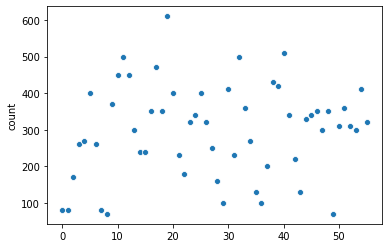

In [17]:
sns.scatterplot(data=pd_main, x=range(0, len(pd_main)), y='count')

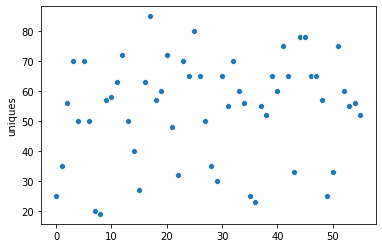

In [18]:
sns.scatterplot(data=pd_main, x=range(0, len(pd_main)), y='uniques')

In [19]:
# Check
# data = json.loads('07-27-2019_json.json')
# counts = data['count']
# uniques = data['uniques']
# timestamp_data = data['views']
# df = pd.DataFrame(timestamp_data)
# df

In [20]:
!ls

07-27-2019_views-json.json  08-27-2019_views-json.json
07-30-2019_views-json.json  08-31-2019_views-json.json
08-02-2019_views-json.json  09-07-2019_views-json.json
08-06-2019_views-json.json  clones
08-13-2019_views-json.json  old_clones_constructor.ipynb
08-18-2019_views-json.json  old_views_constructor.ipynb
08-21-2019_views-json.json  old_views.csv
08-23-2019_views-json.json
